<a href="https://colab.research.google.com/github/RakeshBB08/Deep_learning/blob/master/classification_using_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np


In [2]:
# load the data
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [7]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
type(data)

sklearn.utils._bunch.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
data.data.shape

(569, 30)

In [9]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
data.target.shape

(569,)

In [12]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(data.data,data.target,test_size = 0.2)

In [16]:
N,D = X_train.shape
N,D

(455, 30)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (D,)),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [24]:
model.compile('adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [26]:
r = model.fit(X_train,y_train, validation_data = (X_test,y_test),epochs = 100)

Epoch 1/100
15/15 [==============================] - 1s 19ms/step - loss: 0.4519 - accuracy: 0.8352 - val_loss: 0.4051 - val_accuracy: 0.8070
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4144 - accuracy: 0.8549 - val_loss: 0.3694 - val_accuracy: 0.8596
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3833 - accuracy: 0.8659 - val_loss: 0.3381 - val_accuracy: 0.8947
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3563 - accuracy: 0.8857 - val_loss: 0.3120 - val_accuracy: 0.9035
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3328 - accuracy: 0.8923 - val_loss: 0.2887 - val_accuracy: 0.9211
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3127 - accuracy: 0.9033 - val_loss: 0.2690 - val_accuracy: 0.9211
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.2941 - accuracy: 0.9033 - val_loss: 0.2525 - val_accuracy: 0.9298
Epoch 8/100


In [27]:
print("Train score: ", model.evaluate(X_train, y_train))
print("Test score: ", model.evaluate(X_test, y_test))

15/15 [==============================] - 0s 2ms/step - loss: 0.0799 - accuracy: 0.9780
Train score:  [0.07992076873779297, 0.9780219793319702]
4/4 [==============================] - 0s 4ms/step - loss: 0.0732 - accuracy: 0.9825
Test score:  [0.07315073162317276, 0.9824561476707458]


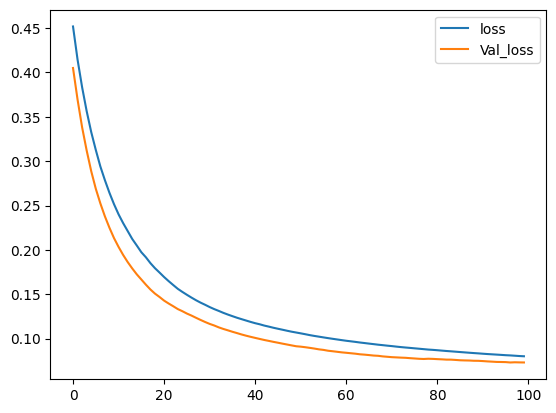

In [28]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'],label = 'Val_loss')
plt.legend()

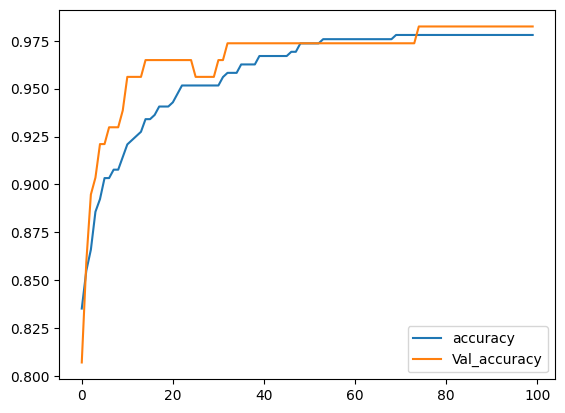

In [31]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'Val_accuracy')
plt.legend()